In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dtype = torch.FloatTensor
torch.manual_seed(2)

In [3]:
time_steps = 12
input_size = 1
hidden_size = 32
output_size = 1
lr=0.02
time_series = np.linspace(0, 10, time_steps)
sinus_time_series = np.sin(time_series)
sinus_time_series = sinus_time_series.reshape(time_steps, 1)
x = torch.Tensor(sinus_time_series[:-1]).type(dtype).view(1, time_steps - 1, 1)
y = torch.Tensor(sinus_time_series[1:]).type(dtype).view(1, time_steps - 1, 1)

In [4]:
class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):
       out, hidden_prev = self.rnn(x, hidden_prev)
       out = out.view(-1, hidden_size)
       out = torch.stack(self.linear(out), dim=1)
       return out, hidden_prev

In [5]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)
hidden_prev = Variable(torch.zeros(1, 1, hidden_size))
x, y = Variable(x), Variable(y)

In [6]:
for iter in range(2000):
      output, hidden_prev = model(x, hidden_prev)
      hidden_prev = Variable(hidden_prev.data)
      loss = criterion(output, y)
      model.zero_grad()
      loss.backward()
      optimizer.step()
      if iter % 100 == 0:
        print("Iteration: {} loss {}".format(iter, loss.data[0]))

Iteration: 0 loss 0.5534168481826782
Iteration: 100 loss 0.21294385194778442
Iteration: 200 loss 0.04000724479556084
Iteration: 300 loss 0.005206013564020395
Iteration: 400 loss 0.0005896748625673354
Iteration: 500 loss 0.0003859095158986747
Iteration: 600 loss 4.483406519284472e-05
Iteration: 700 loss 2.085681899188785e-06
Iteration: 800 loss 0.005243259947746992
Iteration: 900 loss 6.659157492094891e-08
Iteration: 1000 loss 8.919746719016075e-09
Iteration: 1100 loss 0.00012643875379581004
Iteration: 1200 loss 5.929792337155959e-07
Iteration: 1300 loss 0.00011015934433089569
Iteration: 1400 loss 0.00011809196439571679
Iteration: 1500 loss 2.536743886594195e-05
Iteration: 1600 loss 1.2486853847804014e-05
Iteration: 1700 loss 6.453457444877131e-06
Iteration: 1800 loss 2.967860382341314e-06
Iteration: 1900 loss 1.183353333544801e-06


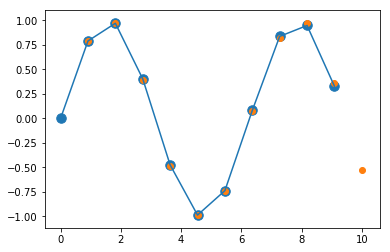

In [7]:
predictions = []
input = x[:, 0,:]
for _ in range(x.shape[1]):
  input = input.view(1, 1, 1)
  (pred, hidden_prev) = model(input, hidden_prev)
  input = pred
  hidden_prev = hidden_prev
  predictions.append(pred.data.numpy().ravel()[0])

x = x.data.numpy().ravel()
y = y.data.numpy()
pl.scatter(time_series[:-1], x.ravel(), s=90)
pl.plot(time_series[:-1], x.ravel())
pl.scatter(time_series[1:], predictions)
pl.show()
